# The World Bank Dataset Recreation
***

The course materials from DataCamp's [Python Data Science Toolbox Part 2](https://app.datacamp.com/learn/courses/python-data-science-toolbox-part-2) include a pre-processed World Bank World Development Indicators dataset in CSV format. My objective was to replicate this dataset from the original source. The following outlines the steps undertaken to achieve this goal.

## Purpose
1. **Effort**: Strive to reconstruct the dataset using the data accessible on the [World Bank Open Data](https://data.worldbank.org/) portal with the assistance of Python and the provided CSV data.
2. **Apply**: Apply the skills acquired through the Data Analyst in Python track to achieve the dataset recreation.
3. **Disseminate**: Share this acquired knowledge with others for mutual learning and understanding.

### Areas covered
1. Loading and Inspecting the Data
2. Cleaning and filtering
   - Investigating differences in the datasets
3. Converting data from wide to long format
4. Merging dataframes
5. A bit of History
8. Validating the result
9. Storing the result back to CSV


## Datacamp Dataset Info
A few notes about the [dataset](https://assets.datacamp.com/production/repositories/464/datasets/2175fef4b3691db03449bbc7ddffb740319c1131/world_ind_pop_data.csv) from DataCamp.
1. Contains five (5) columns:
   1. CountryName
   2. CountryCode
   3. Year
   4. Total Population
   5. Urban population (% of total)
2. Encompassing data from the year 1960 through 2014, inclusive.
3. Consisting of 13,375 rows, inclusive of the header containing the column names.

## The World Bank Data Reference Links
- [Total Population](https://data.worldbank.org/indicator/SP.POP.TOTL?end=2014&start=1960)
  - [CSV ZIP Download](https://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv)
- [Urban population (% of total population)](https://data.worldbank.org/indicator/SP.URB.TOTL.IN.ZS?end=2014&start=1960)
  - [CSV ZIP Download](https://api.worldbank.org/v2/en/indicator/SP.URB.TOTL.IN.ZS?downloadformat=csv)
  - [API Documentation](https://datahelpdesk.worldbank.org/knowledgebase/topics/125589-developer-information) - Not used but perhaps useful to others.


### World Bank Open Data: Dataset Overview
**Files:**
- API_SP.POP.TOTL_DS2_en_csv_v2_6298256.csv: Contains total population numbers.
- API_SP.URB.TOTL.IN.ZS_DS2_en_csv_v2_6300631.csv: Holds urban population as a percentage of the total.

**File Structure:**
- Some text data on rows 1 and 3.
- Column headers commence from row 5.
- 271 total rows in each file.
- 67 columns exist in each file. However, a trailing comma in the final column introduces a 68th column upon import if not handled.

**Time Range:**
- Encompasses data from 1960 to 2022.
 
**Data Format:**
 - Presented in a Wide format with each year serving as a column heading and values distributed across rows.

**Illustrative Samples of World Bank CSV Data in Excel:**

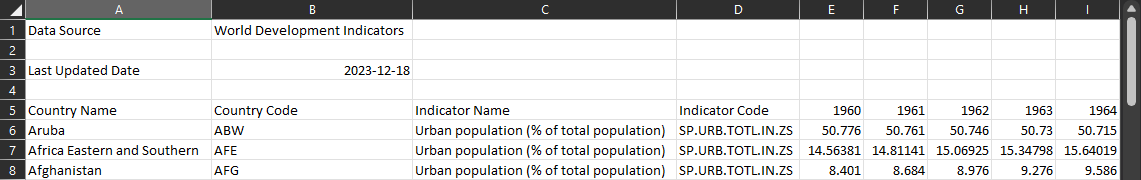

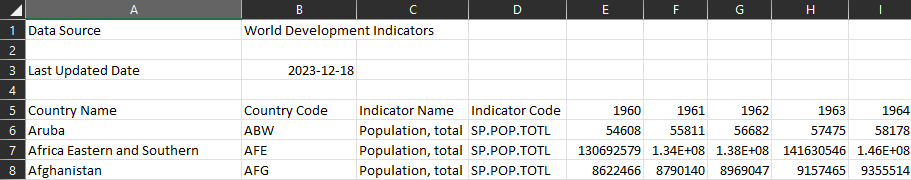




# Summary
In my pursuit to replicate the original dataset from DataCamp, I encountered certain challenges that rendered an exact replication unattainable. The DataCamp dataset, based on my analysis, seems to have originated between 2015-2017, and unfortunately, the World Bank Data lacks readily available archived datasets.

Despite these hurdles, I successfully generated a dataset closely resembling the original. This recreation incorporates the most recent values from the current World Bank Data, offering a comparable representation.

## Observations

1. **Country Codes modified** - In [March of 2017](https://datahelpdesk.worldbank.org/knowledgebase/articles/906522-data-updates-and-errata) new country codes were introduced to align World Bank 3-letter codes with the ISO 3-letter codes. 

<div align="center">

| Country                  | New Code | Old Code\* |
|--------------------------|----------|----------|
| Andorra                  | AND      | ADO      |
| Dem. Rep. Congo          | COD      | ZAR      |
| Isle of Man              | IMN      | IMY      |
| Kosovo                   | XKX      | -        |
| Romania                  | ROU      | ROM      |
| Timor-Leste              | TLS      | TMP      |
| West Bank and Gaza       | PSE      | WBG      |

\* Kosovo (XKX) is only in total_pop dataset.
</div>

-- *Source*:
> [World Development Indicators: March 2017 ](https://datahelpdesk.worldbank.org/knowledgebase/articles/906522-data-updates-and-errata)
> 
> On March 29 new country codes were introduced to align World Bank 3-letter codes with ISO 3-letter codes: Andorra (AND), Dem. Rep. Congo (COD), Isle of Man (IMN), Kosovo (XKX), Romania (ROU), Timor-Leste (TLS), and West Bank and Gaza (PSE).

2. **Enhanced Country Names** - During the dataset recreation process, it came to light that modifications had been made to 17 entries in the CountryName column.

3. **Refined Historical Data** - Historical data undergoes periodic updates, and it seems that such revisions have occurred on a few instances. This conclusion is drawn from a meticulous comparison between the original dataset and the updated data for specific countries and years.

4. **Evolution in Aggregation Patterns** - Noteworthy alterations in the original dataset include the absence of some aggregated regional data and the introduction of new aggregations.



In [28]:
# load our packages
import pandas as pd
import missingno as msno

## Our original dataset

,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
0,Arab World,ARB,1960,9.249590e+07,31.285384
1,Caribbean small states,CSS,1960,4.190810e+06,31.597490
2,Central Europe and the Baltics,CEB,1960,9.140158e+07,44.507921
3,East Asia & Pacific (all income levels),EAS,1960,1.042475e+09,22.471132
4,East Asia & Pacific (developing only),EAP,1960,8.964930e+08,16.917679
5,Euro area,EMU,1960,2.653965e+08,62.096947
6,Europe & Central Asia (all income levels),ECS,1960,6.674890e+08,55.378977
7,Europe & Central Asia (developing only),ECA,1960,1.553174e+08,38.066129
8,European Union,EUU,1960,4.094985e+08,61.212898
9,Fragile and conflict affected situations,FCS,1960,1.203546e+08,17.891972


Shape: (13374, 5)
Number of unique Country Names: 245
Check for missing data:


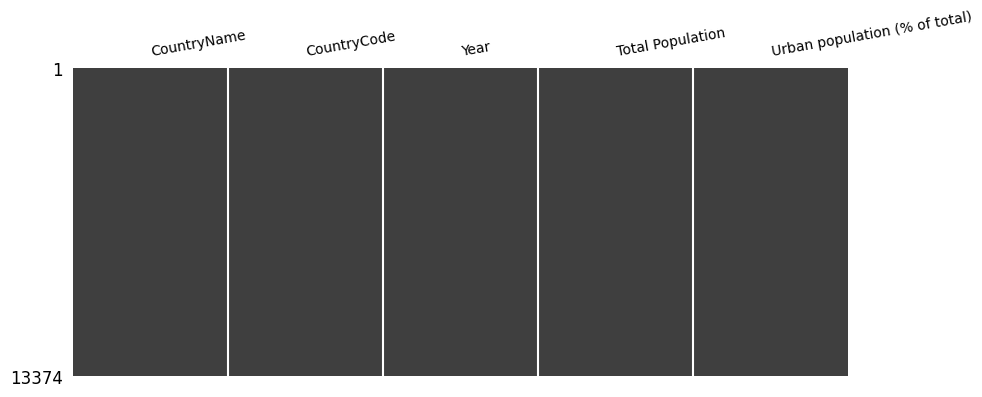

In [29]:
# in case the file location changes we'll load the local copy
# original_df = pd.read_csv('https://assets.datacamp.com/production/repositories/464/datasets/2175fef4b3691db03449bbc7ddffb740319c1131/world_ind_pop_data.csv')
original_df = pd.read_csv('data/world_ind_pop_data.csv')
display(original_df.head(10))
print(f'Shape: {original_df.shape}')
print(f'Number of unique Country Names: {original_df.CountryName.nunique()}')   

# check for missinginess
print('Check for missing data:')
msno.matrix(original_df, figsize=(10,4), fontsize=10, label_rotation=10, sparkline=False);

No null values in our data

## Load in our Total Population data


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,94483.0,95606.0,96787.0,97996.0,99212.0,100341.0,101288.0,102112.0,102880.0,103594.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,457153837.0,469508516.0,482406426.0,495748900.0,509410477.0,523459657.0,537792950.0,552530654.0,567892149.0,583651101.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,24411191.0,25442944.0,25903301.0,26427199.0,27385307.0,28189672.0,29249157.0,30466479.0,31541209.0,32716210.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,309824829.0,318601484.0,327612838.0,336893835.0,346475221.0,356337762.0,366489204.0,376797999.0,387204553.0,397855507.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,19450959.0,20162340.0,20909684.0,21691522.0,22507674.0,23364185.0,24259111.0,25188292.0,26147002.0,27128337.0
5,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0
6,Andorra,AND,"Population, total",SP.POP.TOTL,9443.0,10216.0,11014.0,11839.0,12690.0,13563.0,...,79826.0,80221.0,78168.0,76055.0,73852.0,71519.0,70567.0,71013.0,71367.0,71621.0
7,Arab World,ARB,"Population, total",SP.POP.TOTL,93359407.0,95760348.0,98268683.0,100892507.0,103618568.0,106444103.0,...,320558754.0,328703057.0,337498222.0,346630443.0,355754908.0,364427661.0,372351065.0,380383408.0,389131555.0,397922915.0
8,United Arab Emirates,ARE,"Population, total",SP.POP.TOTL,133426.0,140984.0,148877.0,157006.0,165305.0,173797.0,...,4280993.0,4898954.0,5872624.0,6988685.0,7992644.0,8481771.0,8575205.0,8664969.0,8751847.0,8835951.0
9,Argentina,ARG,"Population, total",SP.POP.TOTL,20349744.0,20680653.0,21020359.0,21364017.0,21708487.0,22053661.0,...,39070501.0,39476851.0,39876111.0,40273769.0,40684338.0,40788453.0,41261490.0,41733271.0,42202935.0,42669500.0


Shape: (266, 59)
Number of unique Country Names: 266
Check for missing data:


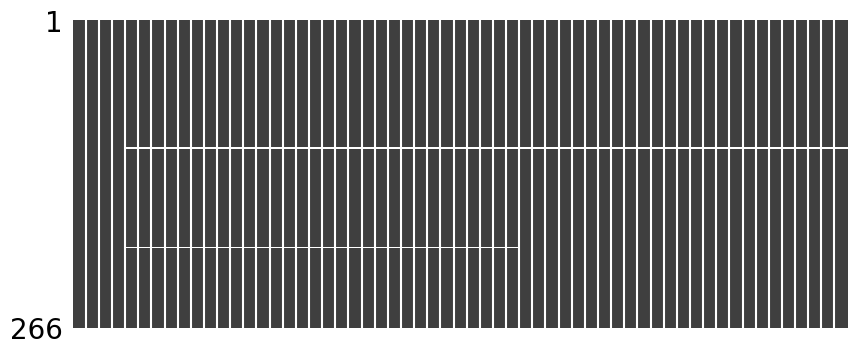

In [30]:
# skiprows 4 will give us the correct lookup for the header OR
# total_pop = pd.read_csv('data/API_SP.POP.TOTL_DS2_en_csv_v2_6298256.csv', skiprows=4)

# header=2 due to the fact that skip_blank_lines=True by default
# total_pop = pd.read_csv('data/API_SP.POP.TOTL_DS2_en_csv_v2_6298256.csv', header=2)

# list of column numbers we want to import
columns = list(range(0, 59, 1))

total_pop_df = pd.read_csv('data/API_SP.POP.TOTL_DS2_en_csv_v2_6298256.csv', skip_blank_lines=False, header=4, usecols=columns)
display(total_pop_df.head(10))
print(f'Shape: {total_pop_df.shape}')
print(f'Number of unique Country Names: {total_pop_df["Country Name"].nunique()}')

# check for missinginess
print('Check for missing data:')
msno.matrix(total_pop_df, figsize=(10,4), sparkline=False);

Based on the matrix above we have at least two countries with missing data. The first one appears to be missing data for all years based on the column ordering. One is missing data from 1960 through 1989.

In [31]:
# Query for rows with missing data in the specified column
total_pop_df[total_pop_df['1960'].isnull()]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
110,Not classified,INX,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,3320396.0,3406334.0,3494496.0,3591977.0,3689099.0,3786161.0,3882986.0,3979998.0,4076708.0,4173398.0


Alternative method using `.query`

In [32]:
# using .query with numerically named columns requires backticks! 
total_pop_df.query("`1960`.isnull()")

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
110,Not classified,INX,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,3320396.0,3406334.0,3494496.0,3591977.0,3689099.0,3786161.0,3882986.0,3979998.0,4076708.0,4173398.0


In [33]:
# store the Country Names with missing values 
tp_missing_names = total_pop_df[total_pop_df['1960'].isnull()]['Country Name'].tolist()
print(tp_missing_names)

['Not classified', 'West Bank and Gaza']


We can see that we have some missing data for the two countries listed above, let's check if they're in the original dataset.

In [34]:
# check to see if missing names are in the original_df
original_df.query('CountryName.isin(@tp_missing_names)').drop_duplicates('CountryName')


,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
7500,West Bank and Gaza,WBG,1990,1978248.0,67.709


Perform a check to see if `INX` is still used as a `Country Code` but was renamed under the `Country Name`

In [35]:
# check to see if the corresponding name for INX was renamed in the original_df
original_df.query('CountryCode.isin(["INX"])').drop_duplicates('CountryCode')

,CountryName,CountryCode,Year,Total Population,Urban population (% of total)


- "Not classified" is not in the original_df, so we can remove it from the total_pop_df. 
- "West Bank and Gaza" does exist in the original data and appears to start with data in 1990, so we will keep it. 

In [36]:
# dropping the INX row from our dataframe
total_pop_df = total_pop_df[total_pop_df["Country Code"] != "INX"]

Now we need to convert our data from wide format to long format.

In [37]:
# Columns to keep
id_vars = ['Country Name', 'Country Code']

# Columns to melt (all of our columns after colummn index 3)
value_vars = total_pop_df.columns[4:]

# Melt the DataFrame
total_pop_long = pd.melt(total_pop_df, id_vars=id_vars, value_vars=value_vars, var_name='Year', value_name='Total Population')

# Convert 'Year' column to numeric
total_pop_long['Year'] = pd.to_numeric(total_pop_long['Year'], errors='coerce')

# Display the resulting DataFrame
display(total_pop_long)

,Country Name,Country Code,Year,Total Population
0,Aruba,ABW,1960,54608.0
1,Africa Eastern and Southern,AFE,1960,130692579.0
2,Afghanistan,AFG,1960,8622466.0
3,Africa Western and Central,AFW,1960,97256290.0
4,Angola,AGO,1960,5357195.0
...,...,...,...,...
14570,Kosovo,XKX,2014,1812771.0
14571,"Yemen, Rep.",YEM,2014,27753304.0
14572,South Africa,ZAF,2014,54729551.0
14573,Zambia,ZMB,2014,15737793.0


In [38]:
# Total Population in long format vs original dataset
print(f'Number of additional rows vs original data: {total_pop_long.shape[0] - original_df.shape[0]}')

Number of additional rows vs original data: 1201


## Import our Urban Population data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776000,50.761000,50.746000,50.730000,50.715000,50.700000,...,44.875000,44.511000,44.147000,43.783000,43.421000,43.059000,42.940000,42.957000,42.990000,43.041000
1,Africa Eastern and Southern,AFE,Urban population (% of total population),SP.URB.TOTL.IN.ZS,14.563810,14.811410,15.069249,15.347976,15.640195,15.941282,...,30.349869,30.676066,30.934766,31.343241,31.757526,32.181291,32.617692,33.040474,33.476212,33.936963
2,Afghanistan,AFG,Urban population (% of total population),SP.URB.TOTL.IN.ZS,8.401000,8.684000,8.976000,9.276000,9.586000,9.904000,...,22.703000,22.907000,23.113000,23.320000,23.528000,23.737000,23.948000,24.160000,24.373000,24.587000
3,Africa Western and Central,AFW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,14.705391,15.090123,15.484076,15.897592,16.329208,16.778650,...,38.434484,39.079304,39.721598,40.360535,41.001512,41.647158,42.288299,42.925885,43.554094,44.180175
4,Angola,AGO,Urban population (% of total population),SP.URB.TOTL.IN.ZS,10.435000,10.798000,11.204000,11.624000,12.058000,12.504000,...,56.000000,56.764000,57.524000,58.282000,59.034000,59.783000,60.528000,61.268000,62.002000,62.731000
5,Albania,ALB,Urban population (% of total population),SP.URB.TOTL.IN.ZS,30.705000,30.943000,31.015000,31.086000,31.158000,31.230000,...,46.731000,47.815000,48.902000,49.991000,51.076000,52.163000,53.247000,54.330000,55.387000,56.423000
6,Andorra,AND,Urban population (% of total population),SP.URB.TOTL.IN.ZS,58.450000,60.983000,63.462000,65.872000,68.205000,70.445000,...,90.285000,89.807000,89.308000,89.004000,88.912000,88.819000,88.726000,88.631000,88.537000,88.441000
7,Arab World,ARB,Urban population (% of total population),SP.URB.TOTL.IN.ZS,31.022162,31.754677,32.494832,33.261493,34.053793,34.882985,...,54.435223,54.834300,55.119668,55.559292,55.996757,56.380418,56.637995,56.864221,57.177974,57.507261
8,United Arab Emirates,ARE,Urban population (% of total population),SP.URB.TOTL.IN.ZS,73.500000,74.383000,75.248000,76.093000,76.919000,77.723000,...,82.262000,82.648000,83.023000,83.387000,83.742000,84.087000,84.423000,84.749000,85.066000,85.375000
9,Argentina,ARG,Urban population (% of total population),SP.URB.TOTL.IN.ZS,73.611000,74.217000,74.767000,75.309000,75.844000,76.369000,...,90.031000,90.200000,90.366000,90.530000,90.691000,90.849000,90.990000,91.121000,91.249000,91.377000


Shape: (266, 59)
Number of unique Country Names: 266
Check for missing data:


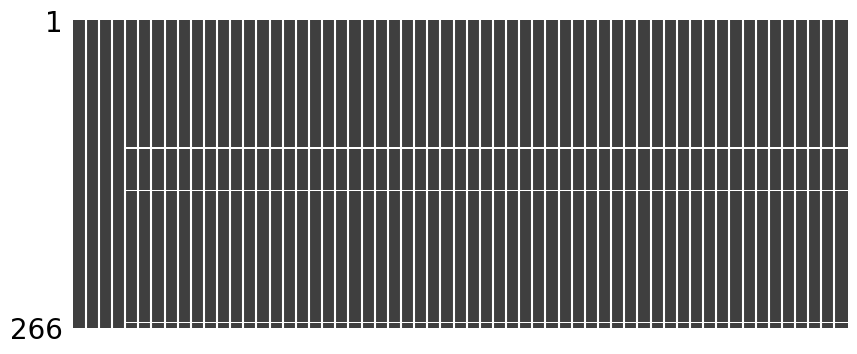

In [39]:
# load in the urban population data
urban_pop_df = pd.read_csv('data/API_SP.URB.TOTL.IN.ZS_DS2_en_csv_v2_6300631.csv', skip_blank_lines=False, header=4)

# remove the last nine columns
urban_pop_df = urban_pop_df.iloc[:,:-9]

# check that the data looks sane
display(urban_pop_df.head(10))
print(f'Shape: {urban_pop_df.shape}')
print(f'Number of unique Country Names: {urban_pop_df["Country Name"].nunique()}')

# check for missing values
print('Check for missing data:')
msno.matrix(urban_pop_df, figsize=(10,4), sparkline=False);

We appear to have 3 rows with missing values across all columns.

In [40]:
up_missing_codes = urban_pop_df[urban_pop_df['1960'].isna()]['Country Code'].tolist()
print(f'Missing urban pop codes: {up_missing_codes}')

print(f'Reporting if the original dataframe has any of those missing codes values: {original_df.CountryCode.isin(up_missing_codes).any()}')

up_missing_names = urban_pop_df[urban_pop_df['1960'].isna()]['Country Name'].tolist()
print(f'\nMissing urban pop names: {up_missing_names}')
print(f'Reporting if the original dataframe has any of those missing names: {original_df.CountryName.isin(up_missing_names).any()}')

Missing urban pop codes: ['INX', 'MAF', 'XKX']
Reporting if the original dataframe has any of those missing codes values: False

Missing urban pop names: ['Not classified', 'St. Martin (French part)', 'Kosovo']
Reporting if the original dataframe has any of those missing names: False


Our original dataset doesn't include those values so we can remove them as well. 

In [41]:
# remove the rows we don't need.
urban_pop_df = urban_pop_df[~urban_pop_df['Country Code'].isin(up_missing_codes)]

# confirm we're no longer missing data
urban_pop_df.query("`1960`.isnull()")

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014


Convert from wide format to long format.

In [42]:
# Columns to keep
id_vars = ['Country Name', 'Country Code']

# Columns to melt (all of our columns after colummn index 3)
value_vars = urban_pop_df.columns[4:]

# Melt the DataFrame
urban_pop_long = pd.melt(urban_pop_df, id_vars=id_vars, value_vars=value_vars, var_name='Year', value_name='Urban population (% of total)')

# Convert 'Year' column to numeric
urban_pop_long['Year'] = pd.to_numeric(urban_pop_long['Year'], errors='coerce')

# Display the resulting DataFrame
display(urban_pop_long)

,Country Name,Country Code,Year,Urban population (% of total)
0,Aruba,ABW,1960,50.776000
1,Africa Eastern and Southern,AFE,1960,14.563810
2,Afghanistan,AFG,1960,8.401000
3,Africa Western and Central,AFW,1960,14.705391
4,Angola,AGO,1960,10.435000
...,...,...,...,...
14460,Samoa,WSM,2014,19.149000
14461,"Yemen, Rep.",YEM,2014,34.165000
14462,South Africa,ZAF,2014,64.312000
14463,Zambia,ZMB,2014,41.382000


In [43]:
# Total Population in long format vs original dataset
print(f'Number of additional rows vs original data: {urban_pop_long.shape[0] - original_df.shape[0]}')

Number of additional rows vs original data: 1091


## Merge our two long dataframes together.
We only want to merge records where all three columns (Country Name, Country Code and Year) match. This should result in a dataset that has equal or fewer rows than the urban_pop_long dataframe. 

In [44]:
merged_df = pd.merge(total_pop_long, urban_pop_long, how='inner', on=['Country Name', 'Country Code', 'Year'])

In [45]:
print(f'Number of additional rows vs original data: {merged_df.shape[0] - original_df.shape[0]}')

Number of additional rows vs original data: 1091


Rename our columns to match the original dataset.

In [46]:
# orignal column names
orig_columns = original_df.columns

# overwrite our merged_df columns to match our original dataset
merged_df.columns = orig_columns

Review the CountryCodes in both datasets

In [47]:
original_country_codes = sorted(original_df.CountryCode.unique().tolist())
print(f'Original country codes:\n{original_country_codes}')

# Check for how may unique country codes we have in original
print(f'Number of unique country codes: {original_df.CountryCode.nunique()}')

merged_df_country_codes = sorted(merged_df.CountryCode.unique().tolist())
print(f'\nMerged country codes:\n{merged_df_country_codes}')

# Check for how may unique country codes we have in merged
print(f'Number of unique country codes: {merged_df.CountryCode.nunique()}')

Original country codes:
['ABW', 'ADO', 'AFG', 'AGO', 'ALB', 'ARB', 'ARE', 'ARG', 'ARM', 'ASM', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CEB', 'CHE', 'CHI', 'CHL', 'CHN', 'CIV', 'CMR', 'COG', 'COL', 'COM', 'CPV', 'CRI', 'CSS', 'CUB', 'CUW', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'EAP', 'EAS', 'ECA', 'ECS', 'ECU', 'EGY', 'EMU', 'ERI', 'ESP', 'EST', 'ETH', 'EUU', 'FCS', 'FIN', 'FJI', 'FRA', 'FRO', 'FSM', 'GAB', 'GBR', 'GEO', 'GHA', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GRL', 'GTM', 'GUM', 'GUY', 'HIC', 'HKG', 'HND', 'HPC', 'HRV', 'HTI', 'HUN', 'IDN', 'IMY', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'KNA', 'KOR', 'KWT', 'LAC', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LCN', 'LDC', 'LIC', 'LIE', 'LKA', 'LMC', 'LMY', 'LSO', 'LTU', 'LUX', 'LVA', 'MAC', 'MAR', 'MCO', 'MDA', 'MDG', 'M

Compare our two lists of CountryCodes

In [48]:
# compare our two lists of country codes
difference_list1 = list(set(original_country_codes) - set(merged_df_country_codes))
difference_list2 = list(set(merged_df_country_codes) - set(original_country_codes))

print(f'Values in original_df not in merged_df:\n{sorted(difference_list1)}')
print(f'\nValues in merged_df not in original_df:\n{sorted(difference_list2)}')


Values in original_df not in merged_df:
['ADO', 'IMY', 'NOC', 'OEC', 'ROM', 'TMP', 'WBG', 'ZAR']

Values in merged_df not in original_df:
['AFE', 'AFW', 'AND', 'COD', 'EAR', 'GIB', 'IBD', 'IBT', 'IDA', 'IDB', 'IDX', 'IMN', 'LTE', 'NRU', 'PRE', 'PSE', 'PST', 'ROU', 'TEA', 'TEC', 'TLA', 'TLS', 'TMN', 'TSA', 'TSS', 'VGB']


Oddly the `XKX` didn't appear in the second list. I wonder why?

In [49]:
total_pop_long.query('`Country Code` == "XKX"').head(1)

,Country Name,Country Code,Year,Total Population
260,Kosovo,XKX,1960,947000.0


In [50]:
urban_pop_long.query('`Country Code` == "XKX"')

,Country Name,Country Code,Year,Urban population (% of total)


It didn't exist in the urban_pop_long list so when the merge was performed it was excluded. 

**New code changes that we know about**

| Country                  | New Code | Old Code\* |
|--------------------------|----------|----------|
| Andorra                  | AND      | ADO      |
| Dem. Rep. Congo          | COD      | ZAR      |
| Isle of Man              | IMN      | IMY      |
| Kosovo                   | XKX      | -        |
| Romania                  | ROU      | ROM      |
| Timor-Leste              | TLS      | TMP      |
| West Bank and Gaza       | PSE      | WBG      |

\* Kosovo (XKX) is only in our total_pop dataset.


We'll replace "Old Code" entries in CountryCode of our `original_df` dataset with the new codes and check for differences and store this into copy of the `original_df` as `original_df2`.

In [51]:
# Create a dictionary mapping old codes to new codes
code_mapping = {'ADO': 'AND', 'ZAR': 'COD', 'IMY': 'IMN', 'ROM': 'ROU', 'TMP': 'TLS', 'WBG': 'PSE'}

# create a copy of our original_df 
original_df2 = original_df.copy(deep=True)

# Update the 'CountryCode' column with the new codes in original_df2
original_df2['CountryCode'].replace(code_mapping, inplace=True)

In [52]:
# print our our list of country codes from the original_df
original_df_country_codes = sorted(original_df.CountryCode.unique().tolist())
print(f'original_df country codes:\n{original_df_country_codes}')

# Check for how may unique country codes we have in original
print(f'Number of unique country codes: {original_df.CountryCode.nunique()}')

# print our our list of country codes from updated df original_df2
original_df2_country_codes = sorted(original_df2.CountryCode.unique().tolist())
print(f'\noriginal_df2 country codes:\n{original_df2_country_codes}')

# Check for how may unique country codes we have in original
print(f'Number of unique country codes: {original_df2.CountryCode.nunique()}')

# print our our list of country codes from the merged_df
merged_df_country_codes = sorted(merged_df.CountryCode.unique().tolist())
print(f'\nmerged_df country codes:\n{merged_df_country_codes}')

# Check for how may unique country codes we have in merged
print(f'Number of unique country codes: {merged_df.CountryCode.nunique()}')

original_df country codes:
['ABW', 'ADO', 'AFG', 'AGO', 'ALB', 'ARB', 'ARE', 'ARG', 'ARM', 'ASM', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CEB', 'CHE', 'CHI', 'CHL', 'CHN', 'CIV', 'CMR', 'COG', 'COL', 'COM', 'CPV', 'CRI', 'CSS', 'CUB', 'CUW', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'EAP', 'EAS', 'ECA', 'ECS', 'ECU', 'EGY', 'EMU', 'ERI', 'ESP', 'EST', 'ETH', 'EUU', 'FCS', 'FIN', 'FJI', 'FRA', 'FRO', 'FSM', 'GAB', 'GBR', 'GEO', 'GHA', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GRL', 'GTM', 'GUM', 'GUY', 'HIC', 'HKG', 'HND', 'HPC', 'HRV', 'HTI', 'HUN', 'IDN', 'IMY', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'KNA', 'KOR', 'KWT', 'LAC', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LCN', 'LDC', 'LIC', 'LIE', 'LKA', 'LMC', 'LMY', 'LSO', 'LTU', 'LUX', 'LVA', 'MAC', 'MAR', 'MCO', 'MDA', 'MDG',

In [53]:
# compare our two lists of country codes
difference_list1 = list(set(original_df2_country_codes) - set(merged_df_country_codes))
difference_list2 = list(set(merged_df_country_codes) - set(original_df2_country_codes))

print(f'Values in original_df2 not in merged_df:\n{sorted(difference_list1)}')
print(f'\nValues in merged_df not in original_df2:\n{sorted(difference_list2)}')

Values in original_df2 not in merged_df:
['NOC', 'OEC']

Values in merged_df not in original_df2:
['AFE', 'AFW', 'EAR', 'GIB', 'IBD', 'IBT', 'IDA', 'IDB', 'IDX', 'LTE', 'NRU', 'PRE', 'PST', 'TEA', 'TEC', 'TLA', 'TMN', 'TSA', 'TSS', 'VGB']


Report the `CountryName` values that appear in our `original_df2` but do not exist in the `merged_df`.

In [54]:
# see what CountryNames that don't appear in our new data
original_df2.query('CountryCode.isin(@difference_list1)').drop_duplicates(subset='CountryCode')[['CountryName', 'CountryCode']]


,CountryName,CountryCode
12,High income: nonOECD,NOC
13,High income: OECD,OEC


Report the `CountryName` values that don't appear on our `merged_df` but did exist in the `original_df2`.

In [55]:
# see what CountryNames that appear in our new data not in our original excluding the known code changes
merged_df.query('CountryCode.isin(@difference_list2)').drop_duplicates(subset='CountryCode')[['CountryName', 'CountryCode']]

,CountryName,CountryCode
1,Africa Eastern and Southern,AFE
3,Africa Western and Central,AFW
62,Early-demographic dividend,EAR
84,Gibraltar,GIB
102,IBRD only,IBD
103,IDA & IBRD total,IBT
104,IDA total,IDA
105,IDA blend,IDB
107,IDA only,IDX
141,Late-demographic dividend,LTE


Most of these entries appear to be new grouping categories. Except for the following:
- British Virgin Islands
- Gibraltar
- Nauru 


In [56]:
# check to see what data we have for the contries listed above
merged_df.query('CountryCode.isin(["GIB", "NRU","VGB"])').drop_duplicates(subset='CountryCode')

,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
84,Gibraltar,GIB,1960,21822.0,100.000
177,Nauru,NRU,1960,4582.0,100.000
253,British Virgin Islands,VGB,1960,7850.0,12.228


In [57]:
# check to see what country categories contain OEC or income in original_df2
original_df2.query('CountryName.str.contains("OEC|income")').drop_duplicates(subset='CountryCode')

,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
3,East Asia & Pacific (all income levels),EAS,1960,1.042475e+09,22.471132
6,Europe & Central Asia (all income levels),ECS,1960,6.674890e+08,55.378977
11,High income,HIC,1960,9.075975e+08,62.680332
12,High income: nonOECD,NOC,1960,1.866767e+08,56.107863
13,High income: OECD,OEC,1960,7.209208e+08,64.285435
14,Latin America & Caribbean (all income levels),LCN,1960,2.205642e+08,49.284688
17,Low & middle income,LMY,1960,2.127373e+09,21.272894
18,Low income,LIC,1960,1.571884e+08,11.498396
19,Lower middle income,LMC,1960,9.429116e+08,19.810513
20,Middle East & North Africa (all income levels),MEA,1960,1.055126e+08,34.951334


In [58]:
# check to see what country categories contain OEC or income in the merged_df
merged_df.query('CountryName.str.contains("OEC|income")').drop_duplicates(subset='CountryCode')

,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
61,East Asia & Pacific (excluding high income),EAP,1960,8.964622e+08,16.955381
64,Europe & Central Asia (excluding high income),ECA,1960,2.557261e+08,45.742475
95,High income,HIC,1960,7.801386e+08,62.788868
127,Latin America & Caribbean (excluding high income),LAC,1960,1.947111e+08,47.967090
135,Low income,LIC,1960,1.357626e+08,13.449721
138,Lower middle income,LMC,1960,9.058328e+08,20.162106
139,Low & middle income,LMY,1960,2.243179e+09,23.345878
154,Middle income,MIC,1960,2.107416e+09,23.983688
159,Middle East & North Africa (excluding high inc...,MNA,1960,9.717966e+07,33.776504
179,OECD members,OED,1960,8.076309e+08,62.176649


It would appear that the newer dataset has:
- Dropped the `High income: OECD` and `High income: nonOECD` aggregated data. 
  - I was unable to locate change notes for this. 
- Changed, Eliminated or Added multiple grouping categories.

***
## Reach for parity
As we have slightly different Total Population Values and Urban population values we'll move forward with getting as close as possible to the original dataset. 

To do that we'll:
- Remove the `OEC` and `NOC` related data from the ori`g`inal_df2 dataset
- Remove all the rows which we had `CountryCodes` that didn't exist in the `original_df2` dataset from our `merged_df`.
  > ['AFE', 'AFW', 'EAR', 'GIB', 'IBD', 'IBT', 'IDA', 'IDB', 'IDX', 'LTE', 
  > 'NRU', 'PRE', 'PST', 'TEA', 'TEC', 'TLA', 'TMN', 'TSA', 'TSS', 'VGB']

In [59]:
# drop the high income: OECD and nonOECD data from original_df2
original_df2 = original_df2.query('~CountryCode.isin(["OEC", "NOC"])')

print(original_df.shape)
print(original_df2.shape)
print(original_df2.CountryCode.nunique())

(13374, 5)
(13264, 5)
243


In [60]:
# remove columns not in original_df2 from merged_df
merged_df2 = merged_df.query('~CountryCode.isin(@difference_list2)')
print(merged_df.shape)
print(merged_df2.shape)
print(merged_df2.CountryCode.nunique())

(14465, 5)
(13365, 5)
243


In [61]:
# check to see if we missed any records 
original_df2_country_codes = sorted(original_df2.CountryCode.unique().tolist())
merged_df2_country_codes = sorted(merged_df2.CountryCode.unique().tolist())

# compare our two lists of country codes
difference_list1 = list(set(original_df2_country_codes) - set(merged_df2_country_codes))
difference_list2 = list(set(merged_df2_country_codes) - set(original_df2_country_codes))

print(f'Values in original not in merged_df:\n{sorted(difference_list1)}')
print(f'Values in merged_df not in original:\n{sorted(difference_list2)}')

Values in original not in merged_df:
[]
Values in merged_df not in original:
[]


In [62]:
print(f'Row count difference between merged and original: {merged_df2.shape[0] - original_df2.shape[0]}')

Row count difference between merged and original: 101


Now we have parity with the `CountryCode` values. Our `merged_df2` and `original_df2` row counts are still not the same as we have `101` more rows in the `merged_df2` dataframe.

Let's perform some sanity checks.

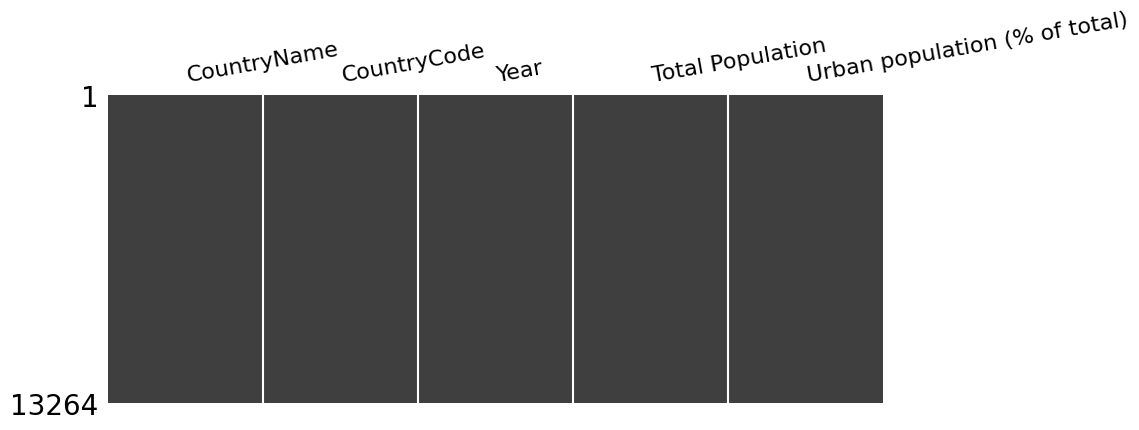

In [63]:
# sanity check for missing values in new original_df2 dataframe
msno.matrix(original_df2, figsize=(10,4), sparkline=False, label_rotation=10);

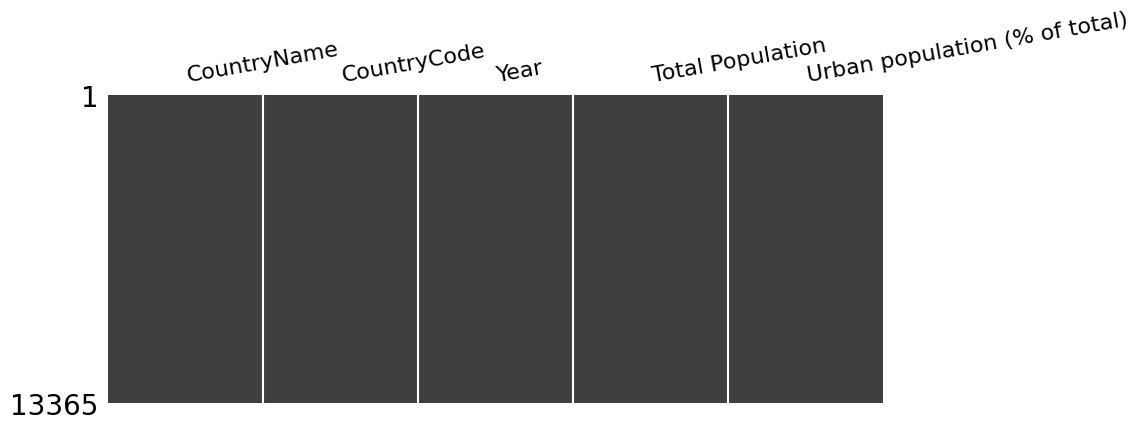

In [64]:
# sanity check for missing values in new merged_df2 dataframe
msno.matrix(merged_df2, figsize=(10,4), sparkline=False, label_rotation=10);

Let's sort our values and reset the index. We'll do this by `CountryCode` and `Year` for each dataframe.

In [65]:
# sort our data and reset the index for original_df2
original_df2 = original_df2.sort_values(by=['CountryCode', 'Year']).reset_index(drop=True)

# Display the updated DataFrame
display(original_df2)

,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
0,Aruba,ABW,1960,54208.0,50.776
1,Aruba,ABW,1961,55435.0,50.761
2,Aruba,ABW,1962,56226.0,50.746
3,Aruba,ABW,1963,56697.0,50.730
4,Aruba,ABW,1964,57029.0,50.715
...,...,...,...,...,...
13259,Zimbabwe,ZWE,2010,13973897.0,33.196
13260,Zimbabwe,ZWE,2011,14255592.0,33.015
13261,Zimbabwe,ZWE,2012,14565482.0,32.834
13262,Zimbabwe,ZWE,2013,14898092.0,32.654


In [66]:
# sort our data and reset the index for merged_df2
merged_df2 = merged_df2.sort_values(by=['CountryCode', 'Year']).reset_index(drop=True)

display(merged_df2)

,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
0,Aruba,ABW,1960,54608.0,50.776
1,Aruba,ABW,1961,55811.0,50.761
2,Aruba,ABW,1962,56682.0,50.746
3,Aruba,ABW,1963,57475.0,50.730
4,Aruba,ABW,1964,58178.0,50.715
...,...,...,...,...,...
13360,Zimbabwe,ZWE,2010,12839771.0,33.196
13361,Zimbabwe,ZWE,2011,13025785.0,33.015
13362,Zimbabwe,ZWE,2012,13265331.0,32.834
13363,Zimbabwe,ZWE,2013,13555422.0,32.654


Now we can do a merge to see what common rows exist between each dataframe. We'll use the `CountryName`, `CountryCode` and `Year` as our keys to join on. 

In [67]:
# find the common rows by merging them using inner
common_rows = pd.merge(original_df2, merged_df2, how='inner', on=['CountryName','CountryCode', 'Year'], suffixes=('_original', '_merged'), indicator=True)
display(common_rows)

,CountryName,CountryCode,Year,Total Population_original,Urban population (% of total)_original,Total Population_merged,Urban population (% of total)_merged,_merge
0,Aruba,ABW,1960,54208.0,50.776,54608.0,50.776,both
1,Aruba,ABW,1961,55435.0,50.761,55811.0,50.761,both
2,Aruba,ABW,1962,56226.0,50.746,56682.0,50.746,both
3,Aruba,ABW,1963,56697.0,50.730,57475.0,50.730,both
4,Aruba,ABW,1964,57029.0,50.715,58178.0,50.715,both
...,...,...,...,...,...,...,...,...
12324,Zimbabwe,ZWE,2010,13973897.0,33.196,12839771.0,33.196,both
12325,Zimbabwe,ZWE,2011,14255592.0,33.015,13025785.0,33.015,both
12326,Zimbabwe,ZWE,2012,14565482.0,32.834,13265331.0,32.834,both
12327,Zimbabwe,ZWE,2013,14898092.0,32.654,13555422.0,32.654,both


In [68]:
# difference between the common_rows and original_df2
common_rows.shape[0] - original_df2.shape[0]

-935

Well that was unexpected! We ended up with 935 less rows in this merge where I was expecting it to be the same number of rows in our `original_df2` dataframe. Ok, so let's see what didn't get include to see if that sheds any light.

In [69]:
# Merge dataframes based on the specified columns using outer
merged_data = pd.merge(original_df2, merged_df2, on=["CountryName", "CountryCode", "Year"], how="outer", suffixes=('_original', '_merged'), indicator=True)

# Filter rows where values differ in the specified columns
differing_rows = merged_data[merged_data["_merge"] != "both"]

# Display the differing rows
display(differing_rows)

,CountryName,CountryCode,Year,Total Population_original,Urban population (% of total)_original,Total Population_merged,Urban population (% of total)_merged,_merge
2860,Czech Republic,CZE,1960,9602006.0,59.548,NaN,NaN,left_only
2861,Czech Republic,CZE,1961,9586651.0,60.063,NaN,NaN,left_only
2862,Czech Republic,CZE,1962,9624660.0,60.555,NaN,NaN,left_only
2863,Czech Republic,CZE,1963,9670685.0,61.044,NaN,NaN,left_only
2864,Czech Republic,CZE,1964,9727804.0,61.532,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...
14295,Viet Nam,VNM,2010,NaN,NaN,87411012.0,30.417,right_only
14296,Viet Nam,VNM,2011,NaN,NaN,88349117.0,31.080,right_only
14297,Viet Nam,VNM,2012,NaN,NaN,89301326.0,31.752,right_only
14298,Viet Nam,VNM,2013,NaN,NaN,90267739.0,32.429,right_only


That might be even more unexpected. We've ended up with 1971 rows of differences, but why? 
We can see that the first 5 records exist only in the `original_df2`, but previously we had parity with the `CountryCode` values so what gives?

Let's investitgate what is going on there. 

In [70]:
# check the merged_df2 for CountryCode with CZE as this appear only in the merged_df2 dataframe
display(merged_df2.query('CountryCode == "CZE"').head())

# check the original_df2 for CountryCode with VNM as this appears only in the original_df2 dataframe
display(original_df2.query('CountryCode == "VNM"').head())


,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
2860,Czechia,CZE,1960,9602006.0,59.548
2861,Czechia,CZE,1961,9586651.0,60.063
2862,Czechia,CZE,1962,9624660.0,60.555
2863,Czechia,CZE,1963,9670685.0,61.044
2864,Czechia,CZE,1964,9727804.0,61.532


,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
12824,Vietnam,VNM,1960,34743000.0,14.700
12825,Vietnam,VNM,1961,35428000.0,15.031
12826,Vietnam,VNM,1962,36123000.0,15.369
12827,Vietnam,VNM,1963,36836000.0,15.714
12828,Vietnam,VNM,1964,37574000.0,16.064


Voila! The `CountryName` for `CountryCode` `CZE` was **"Czech Republic"** in the DataCamp dataset but in the newer ones is **"Czechia"**. Also, the `CountryName` for `VNM` was **"Vietnam"** in the DataCamp dataset, but the newer one is **"Viet Nam"**. 

> The Czech Republic officially became known as Czechia in 2016. 

> **Vietnam** is the English spelling, but **Viet Nam** is also used.

How many other names changed?

In [71]:
# configure pandas so it won't truncate the returned values
pd.set_option('display.max_colwidth', None)

# extract the data we're interested in 
result_df  = differing_rows.query('_merge != "both"')\
    .groupby('CountryCode')["CountryName"]\
    .unique()\
    .reset_index()
# display(result_df)

# we need to filter out entries which just didn't have name changes
filtered_result = result_df[result_df.CountryName.apply(len) > 1]
display(filtered_result)
print(f'Number of Countries with name changes: {len(filtered_result)}')

# reset the max_colwidth back to defaults 
pd.reset_option('display.max_colwidth')

,CountryCode,CountryName
0,CZE,"[Czech Republic, Czechia]"
1,EAP,"[East Asia & Pacific (developing only), East Asia & Pacific (excluding high income)]"
2,EAS,"[East Asia & Pacific (all income levels), East Asia & Pacific]"
3,ECA,"[Europe & Central Asia (developing only), Europe & Central Asia (excluding high income)]"
4,ECS,"[Europe & Central Asia (all income levels), Europe & Central Asia]"
5,FRO,"[Faeroe Islands, Faroe Islands]"
7,LAC,"[Latin America & Caribbean (developing only), Latin America & Caribbean (excluding high income)]"
8,LCN,"[Latin America & Caribbean (all income levels), Latin America & Caribbean]"
9,MEA,"[Middle East & North Africa (all income levels), Middle East & North Africa]"
10,MKD,"[Macedonia, FYR, North Macedonia]"


Number of Countries with name changes: 17


Seventeen (17) is quite a number of name changes. Though some appear to be just grouping category changes in name. 

If we perform our merge and exclude the `CountryName` than we should end up with the correct number of rows in our final output. 

In [72]:
# Merge dataframes based on the specified columns but swap the dataframes so that we keep newer country names
final_df = pd.merge(merged_df2, original_df2, on=["CountryCode", "Year"], how="inner")

# sample the updated dataframe for countries we know have update country names
display(final_df.query('CountryCode.isin(["CZE", "FRO", "MKD", "SWZ", "TUR", "VNM"])').sample(15))
print(final_df.shape)

,CountryName_x,CountryCode,Year,Total Population_x,Urban population (% of total)_x,CountryName_y,Total Population_y,Urban population (% of total)_y
4173,Faroe Islands,FRO,2008,48411.0,40.536,Faeroe Islands,48629.0,40.536
2867,Czechia,CZE,1967,9852899.0,62.978,Czech Republic,9852899.0,62.978
4169,Faroe Islands,FRO,2004,47989.0,39.247,Faeroe Islands,48103.0,39.247
2883,Czechia,CZE,1983,10323856.0,75.423,Czech Republic,10323856.0,75.423
12218,Turkiye,TUR,2014,77181884.0,73.077,Turkey,75932348.0,72.891
2898,Czechia,CZE,1998,10294373.0,74.251,Czech Republic,10294373.0,74.251
11475,Eswatini,SWZ,2003,1058797.0,22.296,Swaziland,1087949.0,22.296
12202,Turkiye,TUR,1998,62242204.0,63.703,Turkey,61344874.0,63.703
11437,Eswatini,SWZ,1965,388317.0,6.494,Swaziland,391659.0,6.494
4164,Faroe Islands,FRO,1999,45203.0,35.860,Faeroe Islands,45852.0,35.860


(13264, 8)


Finally the correct number of rows! 

We can see exactly what rows from our new dataset were added since DataCamp created their dataset.

In [73]:
# Merge dataframes based on the specified columns
merged_data = pd.merge(original_df2, merged_df2, on=["CountryCode", "Year"], how="outer", suffixes=('_original', '_merged'), indicator=True)

# Filter rows where they only exist in the merged_df2 
newer_rows = merged_data[merged_data["_merge"] == "right_only"]

# Display the newer rows
display(newer_rows)

,CountryName_original,CountryCode,Year,Total Population_original,Urban population (% of total)_original,CountryName_merged,Total Population_merged,Urban population (% of total)_merged,_merge
13264,NaN,KWT,1992,NaN,NaN,Kuwait,1620633.0,98.002,right_only
13265,NaN,KWT,1993,NaN,NaN,Kuwait,1653645.0,98.016,right_only
13266,NaN,KWT,1994,NaN,NaN,Kuwait,1641106.0,98.029,right_only
13267,NaN,PSE,1960,NaN,NaN,West Bank and Gaza,NaN,44.044,right_only
13268,NaN,PSE,1961,NaN,NaN,West Bank and Gaza,NaN,44.734,right_only
...,...,...,...,...,...,...,...,...,...
13360,NaN,SXM,1993,NaN,NaN,Sint Maarten (Dutch part),31823.0,100.000,right_only
13361,NaN,SXM,1994,NaN,NaN,Sint Maarten (Dutch part),31735.0,100.000,right_only
13362,NaN,SXM,1995,NaN,NaN,Sint Maarten (Dutch part),31596.0,100.000,right_only
13363,NaN,SXM,1996,NaN,NaN,Sint Maarten (Dutch part),31410.0,100.000,right_only


Based on the above this means we have 101 values in the `merged_df2` that don't exist in the `original_df2`, this is our new data. If we drop these rows than we would end up with a near duplicate of our original dataset. 

In [74]:
# Filter rows with _merge == "right_only"
right_only_rows = merged_data[merged_data['_merge'] == 'right_only']

# Keep rows from merged_df2 that don't match the indices of right_only_rows
# we need to reset the index so we can peform a comparison afterwards.
filtered_merged_df2 = merged_df2.loc[~merged_df2.set_index(["CountryCode", "Year"]).index.isin(right_only_rows.set_index(["CountryCode", "Year"]).index)].reset_index(drop=True)

# disply our cleaned dataframe
display(filtered_merged_df2)

,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
0,Aruba,ABW,1960,54608.0,50.776
1,Aruba,ABW,1961,55811.0,50.761
2,Aruba,ABW,1962,56682.0,50.746
3,Aruba,ABW,1963,57475.0,50.730
4,Aruba,ABW,1964,58178.0,50.715
...,...,...,...,...,...
13259,Zimbabwe,ZWE,2010,12839771.0,33.196
13260,Zimbabwe,ZWE,2011,13025785.0,33.015
13261,Zimbabwe,ZWE,2012,13265331.0,32.834
13262,Zimbabwe,ZWE,2013,13555422.0,32.654


Comparing out two dataframes

In [75]:
# comparing the two dataframes
filtered_merged_df2.compare(original_df2, keep_equal=False, keep_shape=True, align_axis=1, result_names=('new', 'orig'))

CountryName      CountryCode      Year      Total Population  \
              new orig         new orig  new orig              new   
0             NaN  NaN         NaN  NaN  NaN  NaN          54608.0   
1             NaN  NaN         NaN  NaN  NaN  NaN          55811.0   
2             NaN  NaN         NaN  NaN  NaN  NaN          56682.0   
3             NaN  NaN         NaN  NaN  NaN  NaN          57475.0   
4             NaN  NaN         NaN  NaN  NaN  NaN          58178.0   
...           ...  ...         ...  ...  ...  ...              ...   
13259         NaN  NaN         NaN  NaN  NaN  NaN       12839771.0   
13260         NaN  NaN         NaN  NaN  NaN  NaN       13025785.0   
13261         NaN  NaN         NaN  NaN  NaN  NaN       13265331.0   
13262         NaN  NaN         NaN  NaN  NaN  NaN       13555422.0   
13263         NaN  NaN         NaN  NaN  NaN  NaN       13855753.0   

                  Urban population (% of total)          
             orig                           new    orig  
0         54208.0                           NaN     NaN  
1         55435.0                           NaN     NaN  
2         56226.0                           NaN     NaN  
3         56697.0                           NaN     NaN  
4         57029.0                           NaN     NaN  
...           ...                           ...     ...  
13259  13973897.0                           NaN     NaN  
13260  14255592.0                           NaN     NaN  
13261  14565482.0                           NaN     NaN  
13262  14898092.0                           NaN     NaN  
13263  15245855.0                        32.504  32.501  

[13264 rows x 10 columns]

We observe that the `Total Population` are mainly the ones that have been updated. 

Reorder the output to get close to the original dataset first by `Year` and then by `CountryName`.

In [76]:
# reorder the data to get close to original dataset from DataCamp
updated_world_ind_pop_data = filtered_merged_df2.sort_values(by=['Year', 'CountryName']).reset_index(drop=True)

display(updated_world_ind_pop_data)

,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
0,Afghanistan,AFG,1960,8.622466e+06,8.40100
1,Albania,ALB,1960,1.608800e+06,30.70500
2,Algeria,DZA,1960,1.139431e+07,30.51000
3,American Samoa,ASM,1960,2.008500e+04,66.21100
4,Andorra,AND,1960,9.443000e+03,58.45000
...,...,...,...,...,...
13259,West Bank and Gaza,PSE,2014,4.173398e+06,75.11300
13260,World,WLD,2014,7.317040e+09,53.36349
13261,"Yemen, Rep.",YEM,2014,2.775330e+07,34.16500
13262,Zambia,ZMB,2014,1.573779e+07,41.38200


Store our data as CSV

In [77]:
# write our updated dataframe to disk
updated_world_ind_pop_data.to_csv('data/output/world_ind_pop_data_2024-01-08.csv', index=False)

**This concludes the recreation. Additionl code and related documentation follows.**
***

## Miscellaneous code for comparisons and troubleshooting
**Code for checking if indices are aligned**

In [78]:
# Check unique indices in merged_df2
unique_indices_merged_df2 = merged_df2.index.unique()

# Check unique indices in merged_data
unique_indices_merged_rows = merged_data.index.unique()

# Compare the unique indices
if set(unique_indices_merged_df2) == set(unique_indices_merged_rows):
    print("Indices are aligned.")
else:
    print("Indices are not aligned.")

Indices are aligned.


**Comparing the shape and additional info**

This was used as the .compare() was failing with a value error. 

```python
print(filtered_merged_df2.info())
print(original_df2.info())
```

```python
filtered_merged_df2.compare(original_df2)
ValueError: Can only compare identically-labeled (both index and columns) DataFrame objects
```

The filtered_merged_df2 had a `RangeIndex: 13264 entries, 0 to 13264` but the original_df2 had: `RangeIndex: 13264 entries, 0 to 13263` which led me to reset the index on the filtered_merged_df2 dataframe. 

## Related Documentation 
### Pandas Functions / Methods
- [.any()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.any.html)
- [.apply()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html)
- [.columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html)
- [.compare()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.compare.html)
- [.copy()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html)
- [.groupby()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)
- [.head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html)
- [.info()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html)
- [.isin()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isin.html)
- [.merge()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)
- [.nunique()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nunique.html)
- [.query()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html)
- [.read_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas-read-csv)
- [.reset_index()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html)
- [.reset_option](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.reset_option.html#pandas-reset-option)
- [.set_option](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html)
- [.shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html)
- [.sort_values()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)
- [.str.contains()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html#pandas-series-str-contains)
- [.tolist()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.tolist.html#pandas.Series.tolist)
- [.to_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html)
- [.unique()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html#pandas.Series.unique)

### Python Functions
- [list()](https://docs.python.org/3/library/functions.html#func-list)
- [set()](https://docs.python.org/3/library/functions.html#func-set)
- [sorted()](https://docs.python.org/3/library/functions.html#sorted)


### Missing Number Package
- [msno.matrix()](https://github.com/ResidentMario/missingno#matrix)